___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

In [1]:
import pandas as pd

ri = pd.read_csv('RI_cleaned.csv')

drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.drop(["stop_date", "stop_time"], axis='columns', inplace=True)

ri.set_index('stop_datetime', inplace=True)

C:\Users\ata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [2]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [3]:
ri.shape

(480584, 20)

In [4]:
ri.is_arrested.mean() ** 100

6.945859729846767e-147

In [5]:
type(ri.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

In [7]:
ri.index.hour.unique()

Int64Index([ 1, 20, 12,  8, 17, 23,  3,  2,  4,  5, 10, 15, 14,  9,  0, 21, 22,
            13, 16, 11,  7, 19, 18,  6],
           dtype='int64', name='stop_datetime')

In [8]:
ri.index.hour.nunique()

24

In [9]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

In [10]:
ri.columns

Index(['id', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')

In [11]:
ri.groupby(ri.index.hour).is_arrested.mean() * 100

stop_datetime
0     5.215148
1     6.712739
2     6.106715
3     5.261330
4     5.389658
5     3.265666
6     1.294866
7     1.382872
8     1.971737
9     2.469853
10    2.558275
11    2.707782
12    3.136088
13    3.024953
14    3.153077
15    3.212483
16    3.351927
17    3.898863
18    3.990156
19    3.136614
20    3.929206
21    5.995630
22    4.398048
23    4.508698
Name: is_arrested, dtype: float64

In [12]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [13]:
import matplotlib.pyplot as plt

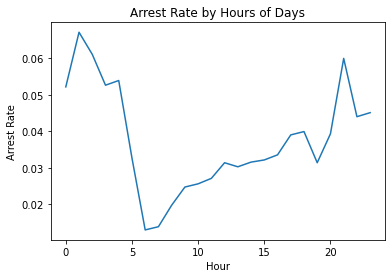

In [14]:
hourly_arrest_rate.plot()

plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Hours of Days");

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [15]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [16]:
ri.drugs_related_stop.value_counts()

False    475819
True       4765
Name: drugs_related_stop, dtype: int64

In [17]:
ri.groupby(ri.index.year).drugs_related_stop.mean()

stop_datetime
2005    0.008038
2006    0.006624
2007    0.008437
2008    0.007549
2009    0.010447
2010    0.010142
2011    0.011400
2012    0.010343
2013    0.011879
2014    0.013176
2015    0.010598
Name: drugs_related_stop, dtype: float64

In [18]:
ri.drugs_related_stop.resample("A").mean() * 100  # Annual: 'A' Month: 'M'  Quarter: 'Q' 
# M', 'A', 'Q', 'BM', 'BA', 'BQ', and 'W'

stop_datetime
2005-12-31    0.803824
2006-12-31    0.662442
2007-12-31    0.843655
2008-12-31    0.754883
2009-12-31    1.044701
2010-12-31    1.014199
2011-12-31    1.140042
2012-12-31    1.034273
2013-12-31    1.187920
2014-12-31    1.317566
2015-12-31    1.059758
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [19]:
ri.drugs_related_stop.resample("M").mean() * 100 

stop_datetime
2005-01-31    11.111111
2005-02-28     0.000000
2005-03-31     0.000000
2005-04-30     0.000000
2005-05-31     0.000000
                ...    
2015-08-31     0.938869
2015-09-30     0.817221
2015-10-31     0.642939
2015-11-30     0.736096
2015-12-31     0.884376
Freq: M, Name: drugs_related_stop, Length: 132, dtype: float64

In [20]:
ri.drugs_related_stop.resample("W").mean() * 100 

stop_datetime
2005-01-02      0.000000
2005-01-09      0.000000
2005-01-16      0.000000
2005-01-23      0.000000
2005-01-30    100.000000
                 ...    
2015-12-06      0.938338
2015-12-13      0.806452
2015-12-20      0.839161
2015-12-27      0.899281
2016-01-03      0.689655
Freq: W-SUN, Name: drugs_related_stop, Length: 575, dtype: float64

In [21]:
annual_drug_rate = ri.drugs_related_stop.resample("A").mean() * 100

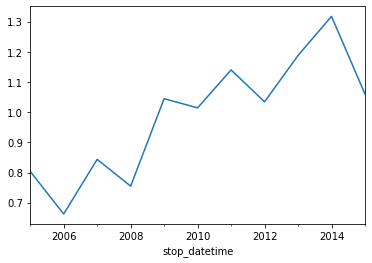

In [22]:
annual_drug_rate.plot()

plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [23]:
ri.columns

Index(['id', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')

In [24]:
ri.search_conducted.head()

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
Name: search_conducted, dtype: object

In [25]:
ri.search_conducted.dropna().astype("int").resample("A").mean()

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [26]:
annual_search_rate = ri.search_conducted.dropna().astype("int").resample("A").mean() * 100

In [27]:
annual = pd.concat([annual_search_rate, annual_drug_rate], axis = "columns") 

In [28]:
annual

,search_conducted,drugs_related_stop
stop_datetime,,
2005-12-31,5.069158,0.803824
2006-12-31,3.774842,0.662442
2007-12-31,4.184367,0.843655
2008-12-31,3.954356,0.754883
2009-12-31,4.984932,1.044701
2010-12-31,4.208925,1.014199
2011-12-31,3.776683,1.140042
2012-12-31,3.227766,1.034273
2013-12-31,2.905396,1.187920


In [29]:
# plt.subplot(2,1,1)

# plt.subplot(2,1,2)

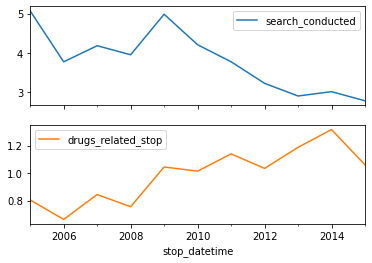

In [31]:
annual.plot(subplots = True)

plt.show()

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [35]:
ri.district.unique()

array(['Zone K1', 'Zone X4', 'Zone X1', 'Zone K3', 'Zone X3', 'Zone K2'],
      dtype=object)

In [37]:
ri.violation.unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [36]:
ri[['district', 'violation']].head()

,district,violation
stop_datetime,,
2005-01-02 01:55:00,Zone K1,Speeding
2005-01-02 20:30:00,Zone X4,Speeding
2005-01-04 12:55:00,Zone X4,Equipment
2005-01-06 01:30:00,Zone X4,Equipment
2005-01-12 08:05:00,Zone X1,Other


In [38]:
ri.groupby(['district', 'violation'])[['violation']].count().head()

violation
district violation                     
Zone K1  Equipment                 3786
         Moving violation          7127
         Other                     1501
         Registration/plates        628
         Seat belt                    1

In [39]:
ri.columns

Index(['id', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')

In [42]:
pd.crosstab(ri['district'], ri['violation'], rownames=['district'], colnames=['violation'])  # pivot table da benzer calisir

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [41]:
pd.crosstab(ri['district'], ri['violation'])

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [44]:
ri.groupby('district')['violation'].value_counts().unstack()  # unstack de crosstab yapar

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [48]:
pd.crosstab(ri['violation'], ri['district'],  rownames=['violation'], colnames=['district'])

district,Zone K1,Zone K2,Zone K3,Zone X1,Zone X3,Zone X4
violation,,,,,,
Equipment,3786,11285,12959,1725,11520,19975
Moving violation,7127,16440,16218,3711,17178,29554
Other,1501,5103,3926,752,4069,8865
Registration/plates,628,4056,3871,192,3532,7551
Seat belt,1,2897,3660,451,4445,4870
Speeding,33067,57500,68234,6393,48687,54855


In [47]:
all_zones = pd.crosstab(ri['violation'], ri['district'])

In [49]:
all_zones

district,Zone K1,Zone K2,Zone K3,Zone X1,Zone X3,Zone X4
violation,,,,,,
Equipment,3786,11285,12959,1725,11520,19975
Moving violation,7127,16440,16218,3711,17178,29554
Other,1501,5103,3926,752,4069,8865
Registration/plates,628,4056,3871,192,3532,7551
Seat belt,1,2897,3660,451,4445,4870
Speeding,33067,57500,68234,6393,48687,54855


In [50]:
k_zones = all_zones.loc[:,'Zone K1':'Zone K2']

In [51]:
k_zones

district,Zone K1,Zone K2
violation,,
Equipment,3786,11285
Moving violation,7127,16440
Other,1501,5103
Registration/plates,628,4056
Seat belt,1,2897
Speeding,33067,57500


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

<Figure size 1800x1200 with 0 Axes>

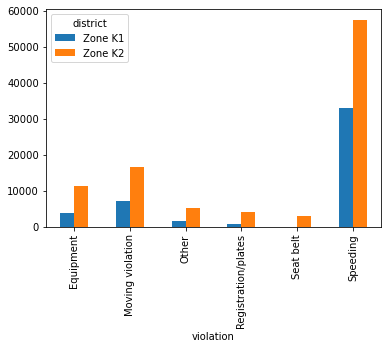

In [52]:
plt.figure(dpi=300)
k_zones.plot.bar();

<Figure size 1200x800 with 0 Axes>

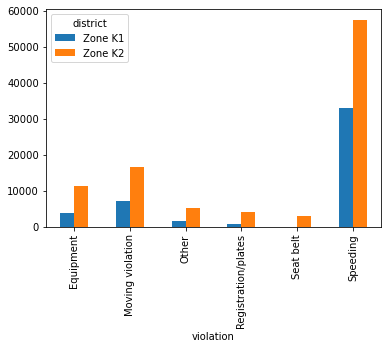

In [55]:
plt.figure(dpi=200)
k_zones.plot(kind='bar');

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

<Figure size 1200x800 with 0 Axes>

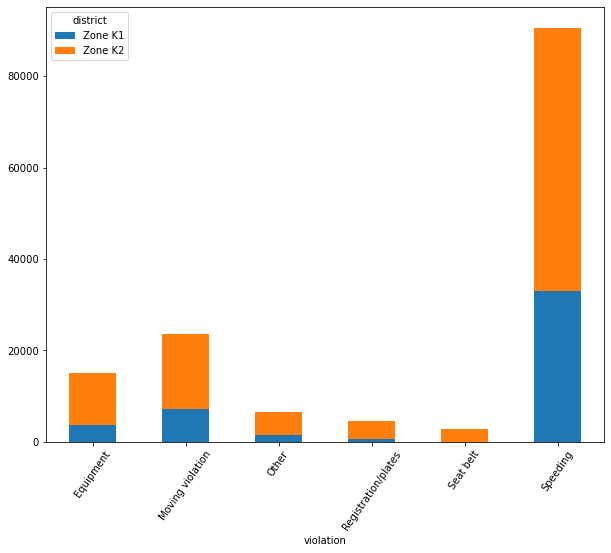

In [57]:
plt.figure(dpi=200)
k_zones.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xticks(rotation = 55);

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [78]:
ri_limited = ri_l = pd.read_csv('RI_cleaned2.csv')

C:\Users\ata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [59]:
ri.stop_duration.sample(10)

stop_datetime
2009-08-21 00:52:00     0-15 Min
2006-05-01 23:45:00     0-15 Min
2010-11-18 16:59:00    16-30 Min
2010-07-13 19:44:00     0-15 Min
2007-12-30 09:34:00     0-15 Min
2009-07-12 23:29:00     0-15 Min
2014-10-21 20:15:00     0-15 Min
2015-09-14 15:51:00     0-15 Min
2010-03-27 23:57:00    16-30 Min
2005-12-28 08:39:00     0-15 Min
Name: stop_duration, dtype: object

In [65]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [79]:
ri_l.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [69]:
ri.stop_duration.dropna(inplace=True)

In [80]:
ri_l.stop_duration.dropna(inplace=True)

In [74]:
stop_duration= ri.stop_duration.map({'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45})

In [98]:
stop_duration

stop_datetime
2005-01-02 01:55:00     8.0
2005-01-02 20:30:00    23.0
2005-01-04 12:55:00     8.0
2005-01-06 01:30:00     8.0
2005-01-12 08:05:00    45.0
                       ... 
2015-12-31 22:46:00     8.0
2015-12-31 22:47:00     8.0
2015-12-31 23:08:00     8.0
2015-12-31 23:44:00     8.0
2015-12-31 23:48:00     8.0
Name: stop_duration, Length: 480584, dtype: float64

In [94]:
stop_duration_l= ri_l.stop_duration.map({'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45})

In [95]:
# Altenatif method with replace
mapping = {"0-15 Min": 8, "16-30 Min": 23, "30+ Min": 45}
ri["stop_duration"].replace(mapping).astype("int")

stop_datetime
2005-01-02 01:55:00     8
2005-01-02 20:30:00    23
2005-01-04 12:55:00     8
2005-01-06 01:30:00     8
2005-01-12 08:05:00    45
                       ..
2015-12-31 22:46:00     8
2015-12-31 22:47:00     8
2015-12-31 23:08:00     8
2015-12-31 23:44:00     8
2015-12-31 23:48:00     8
Name: stop_duration, Length: 480584, dtype: int32

In [99]:
ri['stop_minutes'] = stop_duration

In [100]:
ri_l['stop_minutes'] = stop_duration_l

In [101]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,8.0
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,23.0


In [102]:
ri_l.head()

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_minutes
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,8
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,23
2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,8
3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,8
4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,45


In [103]:
ri.dropna(subset=['stop_minutes'], inplace=True)

In [104]:
ri_l.dropna(subset=['stop_minutes'], inplace=True)

In [303]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,8.0
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,23.0


***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [106]:
ri.stop_minutes.unique()

array([ 8., 23., 45.])

In [107]:
ri_l.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

In [110]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [112]:
ri_l.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 28.078431
Call for Service                    27.637895
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707181
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64

In [115]:
ri_l.groupby('violation_raw').stop_minutes.mean().sort_values(ascending=False)

violation_raw
Special Detail/Directed Patrol      30.902778
Warrant                             29.666667
APB                                 28.078431
Call for Service                    27.637895
Suspicious Person                   21.821429
Registration Violation              17.304170
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Equipment/Inspection Violation      13.668101
Violation of City/Town Ordinance    11.153846
Speeding                             9.707181
Name: stop_minutes, dtype: float64

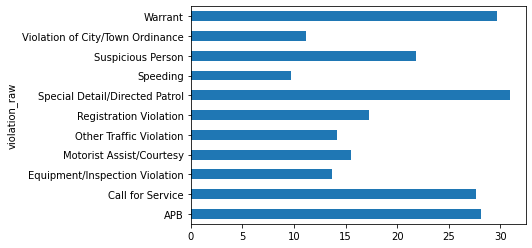

In [120]:
ri_l.groupby('violation_raw').stop_minutes.mean().plot(kind='barh');

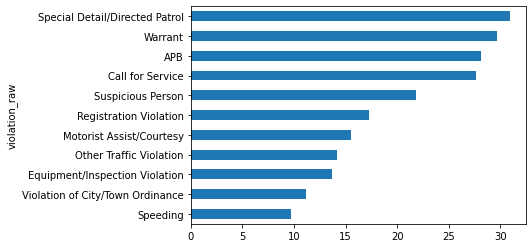

In [119]:
ri_l.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh');